In [27]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import recall_score, make_scorer, precision_score, accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# Import data
data = pd.read_csv('creditcard.csv')

In [65]:
print(f"Dataset shape {data.shape}")

Dataset shape (284807, 31)


In [66]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
"""
Id - A unique Id for each row.

Time - Number of seconds elapsed between this transaction and the first transaction in the dataset

V1-V28 - Features after dimensionality reduction to protect user identities and sensitive features

Amount - Transaction amount

Class - Target Class (1 for fraudulent transactions, 0 genuine)
"""

'\nId - A unique Id for each row.\n\nTime - Number of seconds elapsed between this transaction and the first transaction in the dataset\n\nV1-V28 - Features after dimensionality reduction to protect user identities and sensitive features\n\nAmount - Transaction amount\n\nClass - Target Class (1 for fraudulent transactions, 0 genuine)\n'

### EDA

In [68]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [69]:
# Check for missing values
data.isna().sum() 

## No missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [70]:
# Print column names for training dataset
print("Columns in data:")
print(data.columns)

Columns in data:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


Text(0.5, 1.0, 'The seconds elapsed between each transaction and the first transaction in the dataset')

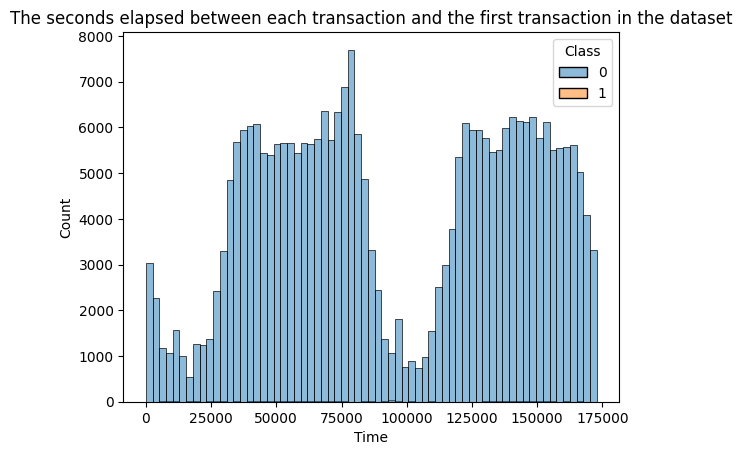

In [71]:
sns.histplot(data=data, x="Time", hue="Class")
plt.title('The seconds elapsed between each transaction and the first transaction in the dataset')

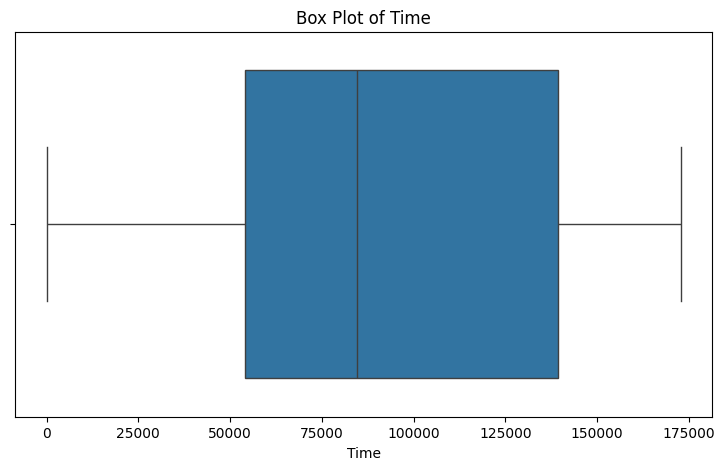

In [72]:
# Box plots for time
plt.figure(figsize=(9, 5))
sns.boxplot(data=data,  x="Time", orient="h")
plt.title("Box Plot of Time")
plt.show()

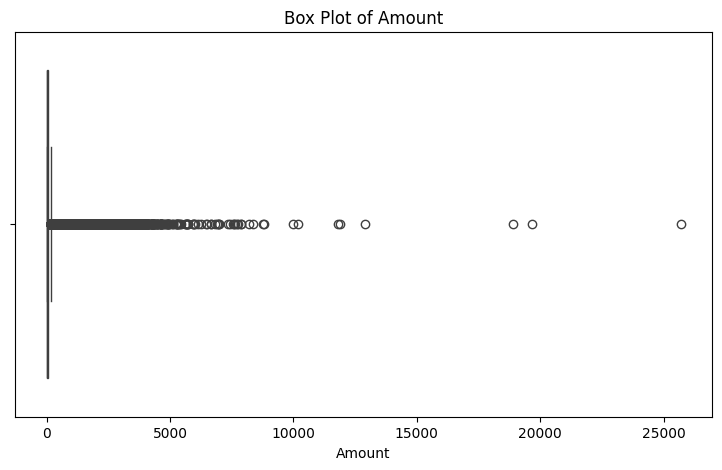

In [73]:
# Box plots for amount
plt.figure(figsize=(9, 5))
sns.boxplot(data=data,  x="Amount", orient="h")
plt.title("Box Plot of Amount")
plt.show()

In [3]:
data[data['Amount'] > 8500]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,42951.0,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,46253.0,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,48401.0,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
74699,55709.0,-16.950064,-16.417395,-12.523381,6.555638,-27.752964,18.072031,28.504065,-10.152220,2.124673,...,-5.932594,0.050097,-10.855949,1.550407,-0.502172,0.821714,12.152401,-4.009839,8790.26,0
151296,95286.0,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,119713.0,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
227921,145283.0,-21.532478,-34.704768,-8.303035,10.264175,3.957175,-3.229695,-4.066768,-4.083971,0.554072,...,5.198718,-7.331078,-32.828995,0.118986,-8.696627,-1.778061,-0.519786,2.716716,10000.00,0
245474,152763.0,-14.641710,-28.554825,-12.714462,5.878264,-7.855074,2.471004,11.922577,-2.651203,-2.223985,...,5.788207,-3.269671,-8.024556,0.423021,-2.396701,-0.633380,-1.763704,1.422017,8787.00,0
274771,166198.0,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,172273.0,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


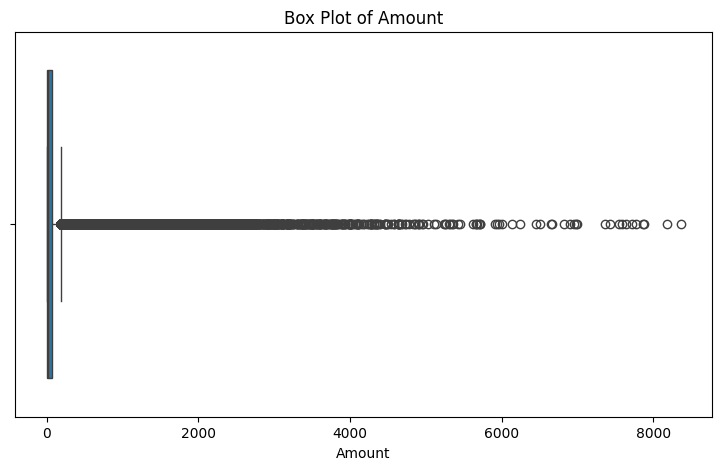

In [4]:
# Box plots for amount
amount = data[data['Amount'] < 8500]
plt.figure(figsize=(9, 5))
sns.boxplot(data=data,  x=amount["Amount"], orient="h")
plt.title("Box Plot of Amount")
plt.show()

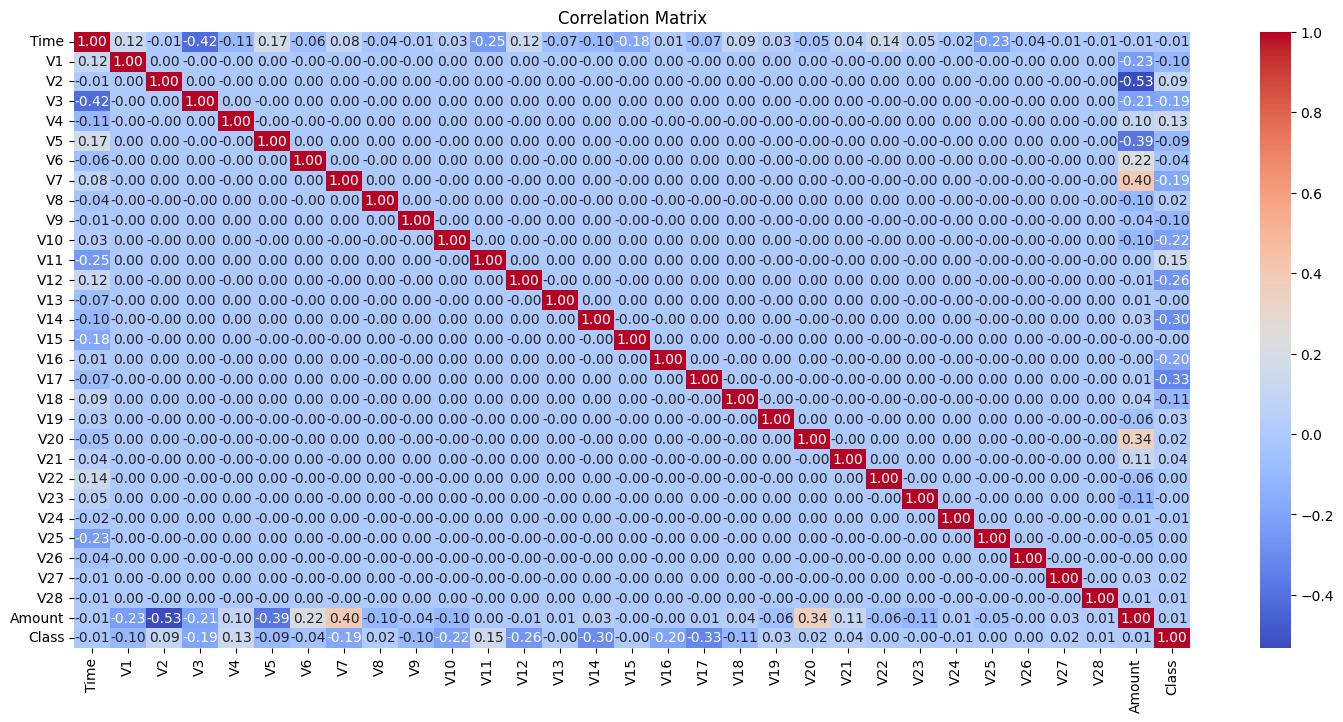

In [76]:
# Correlation matrix
plt.figure(figsize=(18, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# V7 and amount are highly correlated,
# V20 and amount are highly correlated
# Time and V5, V12 and V22 are highly correlated

Text(0.5, 1.0, '1 is fraud, 0 is not')

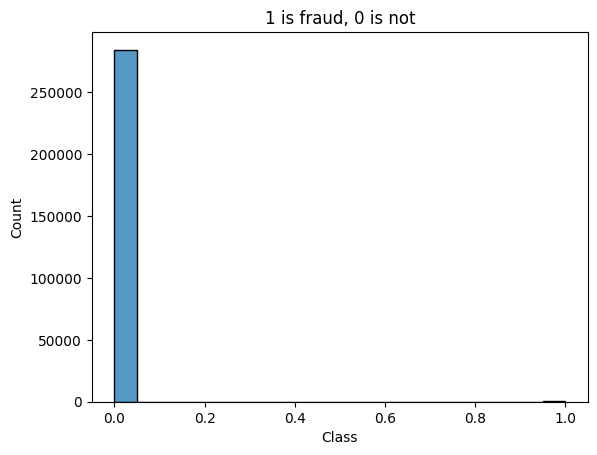

In [77]:
sns.histplot(data=data, x="Class")
plt.title('1 is fraud, 0 is not')

In [5]:
fraud = data[data['Class'] == 1]
nofraud = data[data['Class'] == 0]
fraud.shape, nofraud.shape

((492, 31), (284315, 31))

In [6]:
fraud['Time'].mean(), nofraud['Time'].mean()

# Non-fraud transactions took more time than fraud transactions. These could be some of the indicators for detecting fraud transactions.

(80746.80691056911, 94838.20225805884)

([<matplotlib.patches.Wedge at 0x224010511d0>,
 [Text(-1.09998380137016, 0.0059696501784341355, 'Fraud'),
  Text(1.0999838018177286, -0.005969567707642625, 'No Fraud')],
 [Text(-0.5999911643837235, 0.0032561728246004373, '99.8%'),
  Text(0.5999911646278518, -0.0032561278405323405, '0.2%')])

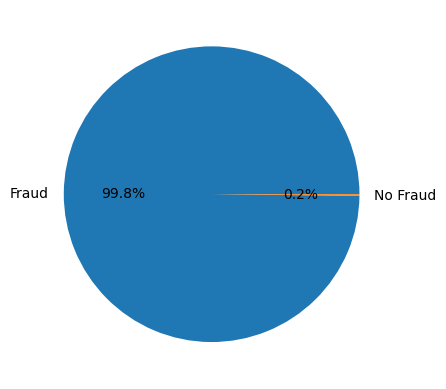

In [7]:
fraud_perc = len(data[data['Class'] == 1]) / len(data) * 100
nofraud_perc = len(data[data['Class'] == 0]) / len(data) * 100
fraud_percentage = [nofraud_perc,fraud_perc]

plt.pie(fraud_percentage,labels = ['Fraud','No Fraud'], autopct='%1.1f%%')

### Data preparation

In [8]:
# Undersample majority class
undersampled_non_fraudulent = resample(nofraud,
                                      replace=False,  # sample without replacement
                                      n_samples=len(fraud),  # match minority class
                                      random_state=42)  # reproducible results

# Combine minority class with undersampled majority class
undersampled_data = pd.concat([fraud, undersampled_non_fraudulent])

# Shuffle the data
undersampled_data = undersampled_data.sample(frac=1, random_state=42)

In [9]:
undersampled_data["Class"].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [10]:
undersampled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
255545,157278.0,1.984787,-1.937036,0.486613,-1.245536,-2.518536,-0.544524,-1.819244,-0.074875,-0.659777,...,0.174011,0.889289,0.218248,0.492384,-0.584599,-0.135040,0.070319,-0.000205,120.00,0
248296,153875.0,-0.613696,3.698772,-5.534941,5.620486,1.649263,-2.335145,-0.907188,0.706362,-3.747646,...,0.319261,-0.471379,-0.075890,-0.667909,-0.642848,0.070600,0.488410,0.292345,0.00,1
76163,56424.0,0.319007,-1.072867,-0.216146,1.494709,-0.627063,-0.761867,0.941687,-0.430272,-0.267431,...,0.332521,-0.022461,-0.537691,0.452072,0.555495,-0.383543,-0.068520,0.106578,484.00,0
239501,150139.0,-6.682832,-2.714268,-5.774530,1.449792,-0.661836,-1.148650,0.849686,0.433427,-1.315646,...,0.220526,1.187013,0.335821,0.215683,0.803110,0.044033,-0.054988,0.082337,237.26,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1


In [11]:
# Separate features and target variable
X = undersampled_data.drop("Class", axis=1)
y = undersampled_data["Class"]

# mapping y_resampled to anomaly detection methods convention (now is 1 fraud and 0 not fraud)
y = [1 if x == 0 else -1 for x in y] # 1 = no fraud, -1 = fraud

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modeling and metrics

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Define the models
models = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples='auto', contamination=0.1, random_state=42),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, contamination=0.1, novelty=True),
    "One-Class SVM": OneClassSVM(kernel='rbf', nu=0.1)
}

# Train models and detect anomalies
results = {}
for name, model in models.items():
    model.fit(X_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Compute confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    # Compute classification report
    classification_report_train = classification_report(y_train, y_pred_train)
    classification_report_test = classification_report(y_test, y_pred_test)
    
    results[name] = {"Train": {"Classification Report": classification_report_train, "Confusion Matrix": cm_train}, 
                     "Test": {"Classification Report": classification_report_test, "Confusion Matrix": cm_test}}

# Print evaluation results
for name, result in results.items():
    print(f"Results for {name}:")
    print("Train set:")
    print("Classification Report:")
    print(result["Train"]["Classification Report"])
    print("Confusion Matrix:")
    print(result["Train"]["Confusion Matrix"])
    
    print("\nTest set:")
    print("Classification Report:")
    print(result["Test"]["Classification Report"])
    print("Confusion Matrix:")
    print(result["Test"]["Confusion Matrix"])


Results for Isolation Forest:
Train set:
Classification Report:
              precision    recall  f1-score   support

          -1       0.97      0.20      0.33       382
           1       0.57      1.00      0.72       405

    accuracy                           0.61       787
   macro avg       0.77      0.60      0.53       787
weighted avg       0.77      0.61      0.53       787

Confusion Matrix:
[[ 77 305]
 [  2 403]]

Test set:
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.24      0.38       110
           1       0.51      1.00      0.67        87

    accuracy                           0.57       197
   macro avg       0.75      0.62      0.53       197
weighted avg       0.78      0.57      0.51       197

Confusion Matrix:
[[26 84]
 [ 0 87]]
Results for Local Outlier Factor:
Train set:
Classification Report:
              precision    recall  f1-score   support

          -1       0.45      0.08      0.13    

c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


#### Hyperparameter tuning One-class SVM

In [16]:
# Define parameters for each classifier
params = {
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['auto', 'scale'],
    'nu': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
}

In [45]:
# Create a One-Class SVM classifier
svm = OneClassSVM()

# After defining the parameter grid and before creating GridSearchCV
# Define a custom scorer for recall_macro, recall_micro, or recall_weighted
scorer = make_scorer(precision_score, average='macro')  # or 'micro', 'weighted'

"""
make_scorer je funkcia v scikit-learn, ktorá umožňuje vytvárať vlastné skóre pre použitie v rôznych metódach hodnotenia, 
ako je napríklad v krížovej validácii alebo v metódach výberu modelov.

Funkcia make_scorer umožňuje vytvoriť skóre z akéhokoľvek metrického funkcie tak, 
aby bol kompatibilný s rozhraním scikit-learn. To znamená, že môžete použiť vlastnú metriku alebo štandardnú metriku 
a prispôsobiť ju potrebám vášho modelu alebo problému.

Návratovou hodnotou funkcie make_scorer je objekt skóre, ktorý je kompatibilný s metódami scikit-learn, 
ako je GridSearchCV alebo cross_val_score, a môže byť použitý na hodnotenie modelov s požadovanou metrikou.

V našom príklade sme použili make_scorer na vytvorenie skóre pre recall s nastavením average='macro', 
čo znamená, že sme vytvorili skóre, ktoré vypočíta recall pre každú triedu a zistí ich nevážený priemer. 
Toto skóre sme následne použili v GridSearchCV pre vyhodnotenie modelov One-Class SVM počas hyperparameter tuningu.
"""

### mala som chybu pri grid_search = GridSearchCV(estimator=svm, param_grid=params, cv=5, scoring='recall')
### nešla mi zobraziť confision matrix a ani GridSearch

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=svm, param_grid=params, cv=5, scoring=scorer)
grid_search.fit(X_train, y_train)

c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brezn\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\brezn\miniconda3\Lib\site-pa

GridSearchCV(cv=5, estimator=OneClassSVM(),
             param_grid={'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'linear', 'poly'],
                         'nu': [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5]},
             scoring=make_scorer(precision_score, response_method='predict', average=macro))

In [46]:
# After grid search and getting the best estimator
best_estimator = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_test = best_estimator.predict(X_test)


# Compute classification report with appropriate average parameter
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_test))  # This should now work without specifying average

Classification Report on Test Set:
              precision    recall  f1-score   support

          -1       0.77      0.09      0.16       110
           1       0.46      0.97      0.62        87

    accuracy                           0.48       197
   macro avg       0.61      0.53      0.39       197
weighted avg       0.63      0.48      0.36       197



In [47]:
grid_search.best_params_

{'gamma': 'auto', 'kernel': 'linear', 'nu': 0.1}

In [ ]:
# Save predictions to a CSV file
# Convert y_pred_test to a pandas DataFrame
# predictions_df = pd.DataFrame(y_pred_test, columns=['Predictions'])

# Concatenate predictions with test data
# test_data_with_predictions = pd.concat([X_test.reset_index(drop=True), y_test.reset_index(drop=True), predictions_df], axis=1)

# Save the DataFrame to a CSV file
# test_data_with_predictions.to_csv('test_data_with_predictions.csv', index=False)